In [2]:
#new data cleaning file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer,PorterStemmer

# from imblearn.under_sampling import ClusterCentroids

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv("predict_AHD_newData_check.csv")

In [3]:
df.head()

,Id,HtmlBody,HtmlBody(Clean Data),Predicted Class,Predicted Score
0,02s1r00001acKkkAAE,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others,100.0
1,02s1r00001blgJyAAI,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,95.0
2,02s1r00001blgcRAAQ,hayley waterman\r\nkone plc\r\nexpense/account...,statement from oasis products vending services...,Others,100.0
3,02s1r00001blj0aAAA,"dear requester,\r\nthank you for writing to us...","ees uk cis deductions hi, after speaking to sh...",Others,100.0
4,02s1r00001blj6TAAQ,"dear requester,\r\nthank you for writing to us...",securitas invoice processed twice in error hi ...,Others,100.0


In [4]:
df.shape


(8744, 5)

In [5]:
df.size

43720

In [6]:
df.describe

<bound method NDFrame.describe of                       Id                                           HtmlBody  \
0     02s1r00001acKkkAAE  good morning,\r\nplease could i have a respons...   
1     02s1r00001blgJyAAI  please find attached copy of statement/queries...   
2     02s1r00001blgcRAAQ  hayley waterman\r\nkone plc\r\nexpense/account...   
3     02s1r00001blj0aAAA  dear requester,\r\nthank you for writing to us...   
4     02s1r00001blj6TAAQ  dear requester,\r\nthank you for writing to us...   
5     02s1r00001blwqoAAA  dear sirs.\r\nplease respond with regards to t...   
6     02s1r00001blz0lAAA  dear requester,\r\nthank you for writing to us...   
7     02s1r00001bm0GBAAY  dear requester,\r\nthank you for writing to us...   
8     02s1r00001bm0JoAAI  dear requester,\r\nthank you for writing to us...   
9     02s1r00001bm1QWAAY  dear requester,\r\nthank you for writing to us...   
10    02s1r00001bm2gQAAQ  dear requester,\r\nthank you for writing to us...   
11    02s1r00001bm

In [7]:
df.drop(['Id','Predicted Score'],axis=1,inplace=True)

In [8]:
df.head(1)

,HtmlBody,HtmlBody(Clean Data),Predicted Class
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others


In [9]:
df = df.rename(index=str, columns={"Predicted Class": "Manual Label"})

In [10]:
df

,HtmlBody,HtmlBody(Clean Data),Manual Label
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others
1,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status
2,hayley waterman\r\nkone plc\r\nexpense/account...,statement from oasis products vending services...,Others
3,"dear requester,\r\nthank you for writing to us...","ees uk cis deductions hi, after speaking to sh...",Others
4,"dear requester,\r\nthank you for writing to us...",securitas invoice processed twice in error hi ...,Others
5,dear sirs.\r\nplease respond with regards to t...,overdue invoice for vendor AHD_NUMBER please a...,Status
6,"dear requester,\r\nthank you for writing to us...",problem hi supplier number AHD_NUMBER problem ...,Others
7,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation
8,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation
9,"dear requester,\r\nthank you for writing to us...",invoice AHD_NUMBER from control applications l...,Others


In [11]:
df.head(1)

,HtmlBody,HtmlBody(Clean Data),Manual Label
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others


In [12]:
df = df.rename(index=str, columns={"HtmlBody(Clean Data)": "HtmlBody (Clean Data)"})

In [13]:
df.head(1)

,HtmlBody,HtmlBody (Clean Data),Manual Label
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others


In [14]:
df.columns = df.columns.str.lower().str.replace(r'[\(\)]','').str.replace('\s','_')

In [15]:
df.columns

Index(['htmlbody', 'htmlbody_clean_data', 'manual_label'], dtype='object')

In [16]:
df.head(1)

,htmlbody,htmlbody_clean_data,manual_label
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others


In [17]:
# print('any null rows:',df.final_body.isnull().any())

# print('the null row is:',df[df.final_body.isnull()])


# df.drop(20, axis=0 , inplace =True)

In [18]:
df.isnull().values.any()

True

In [19]:
df.isnull().sum()

htmlbody               1837
htmlbody_clean_data    1863
manual_label              0
dtype: int64

In [20]:
df.isnull().sum().sum()

3700

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

htmlbody               0
htmlbody_clean_data    0
manual_label           0
dtype: int64

In [23]:
df.manual_label.value_counts()

Others        5615
Status         832
Escalation     434
Name: manual_label, dtype: int64

In [24]:
df['man_label_new'] = df.manual_label.map({'others':'others','status':'status','escalation':'escalation','Others':'others','Status':'status','Status-A':'status','Escalation':'escalation','status-A':'status','Escalation/Others':'unknown','Escalation?':'unknown'})

In [25]:
df.man_label_new.value_counts().sum() == df.manual_label.value_counts().sum()

True

In [26]:
# proportion of data for each class
df.man_label_new.value_counts()/df.man_label_new.value_counts().sum()
df.drop(df[df.man_label_new == 'unknown'].index.values,axis = 0, inplace = True)

In [27]:
# exploring 'status' mails
df[df.man_label_new == 'status'].iloc[9,3]

'status'

In [28]:
# exploring 'escalation' mails
df[df.man_label_new == 'escalation'].iloc[13,3]

'escalation'

In [29]:
# exploring 'others' mails
df[df.man_label_new == 'others'].iloc[4,3]

'others'

In [30]:
# some words that should be removed during tokenization along with any website name and weird characters and proper nouns too
# dont remove good and morning alag se ig
# dont remove symbols like ! and ? which might express emotion
common_words = ['dear','sir',"ma'am",'maam','madam','sirs','AHD_DATE','AHD_NUMBER','AHD_ALPHANUM','AHD_EMAIL','please','invoice','date','regards','tel','telephone',
                'good morning','good afternoon','good evening','i look forward to hearing from you','fax','registered']
# For unclean data : 
# or maybe we can just remove everything after Disclaimer in sents_to_remove[0]
# subject also has to be removed from the unclean data
sents_to_remove = ['Disclaimer: If you have received this e-mail because of an addressing or delivery error, please inform the sender by replying to this e-mail and then delete it immediately. If you are not the intended recipient you must not use, disclose, distribute, copy, or print any of the information in it. Any opinions or views expressed in this message are those of the individual sender, except where the sender specifically states them to be otherwise. Big Yellow Group PLC takes no responsibility as to the presence of any viruses in this e-mail. Big Yellow Group PLC and associated companies. Registered in England and Wales No 3625199. Registered Office: 2 The Deans, Bridge Road, Bagshot, Surrey, GU19 5AT',
                  '']

In [31]:
# check all
pat_1 = re.compile(r'(kind regard.*)')
pat_2 = re.compile(r'(www\.[a-z0-9]+\.com.*)')
pat_3 = re.compile(r'( tel[\s:-].*)')
pat_4 = re.compile(r'( fax.*)')
pat_5 = re.compile(r'( t:.*)')
pat_6 = re.compile(r'( dial:-.*)')
pat_8 = re.compile(r'(cheers .*)')
pat_9 = re.compile(r'(regards,.*)')
pat_10 = re.compile(r'(confidentiality notice.*)')
pat_11 = re.compile(r'(virus.*)')
pat_12 = re.compile(r'(thank you\..*)')
pat_13 = re.compile(r'(bank name:.*)')
pat_14 = re.compile(r'(registered office:.*)')
pat_15 = re.compile(r'(please note my hours.*)')
pat_16 = re.compile(r'(environment before printing.*)')
pat_17 = re.compile(r'(this message is intended.*)')

list_of_pats = [pat_1,pat_2,pat_3,pat_4,pat_5,pat_6,pat_8,pat_9,pat_10,pat_11,pat_12,pat_13,pat_14,pat_15,pat_16,pat_17]

def clean(list_of_pats, list_of_words):
    for i in list_of_pats:
        if i == pat_1:
            df['clean'] = df.htmlbody_clean_data.str.replace(pat_1,'')
        else:
            df['clean'] = df.clean.str.replace(i,'')
    for i in list_of_words:
        df.clean = df.clean.str.replace(i,'')
#         df_true = df[df.clean.str.contains(i) == True]
#         df.loc[df_true.index.values,'clean'] = df_true.final_body.str.replace(i,'')
    return df

df = clean(list_of_pats,common_words)

In [32]:
df['final_body'] = df.clean

In [33]:
def tokenizer(x):
    '''
    Here x is a single text line/ single string.
    '''
    x = x.lower()
    # regex
    x = re.sub(r'[^a-z?!]','',x) # remove everything apart from letters and ? and !
    x = re.sub(r'com','',x) # becoz the '.' was removed above
    x = re.sub(r'\b\w\b','',x) # remove single letters
    
    x = word_tokenize(x)
    x = [i.strip() for i in x]
    x = [i for i in x if i not in stopwords.words('english')]
    lem = WordNetLemmatizer()
    x = [lem.lemmatize(i) for i in x]
    
    return x 

In [34]:
df

,htmlbody,htmlbody_clean_data,manual_label,man_label_new,clean,final_body
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others,others,"payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,status,statement & queries find attached up to stat...,statement & queries find attached up to stat...
2,hayley waterman\r\nkone plc\r\nexpense/account...,statement from oasis products vending services...,Others,others,statement from oasis products vending services...,statement from oasis products vending services...
3,"dear requester,\r\nthank you for writing to us...","ees uk cis deductions hi, after speaking to sh...",Others,others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh..."
4,"dear requester,\r\nthank you for writing to us...",securitas invoice processed twice in error hi ...,Others,others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d..."
5,dear sirs.\r\nplease respond with regards to t...,overdue invoice for vendor AHD_NUMBER please a...,Status,status,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...
6,"dear requester,\r\nthank you for writing to us...",problem hi supplier number AHD_NUMBER problem ...,Others,others,problem hi supplier number problem – cis sh...,problem hi supplier number problem – cis sh...
7,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
8,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
9,"dear requester,\r\nthank you for writing to us...",invoice AHD_NUMBER from control applications l...,Others,others,from control applications limited note the...,from control applications limited note the...


In [35]:
df.to_csv("new_file_made.csv")

In [36]:
list1 = df['final_body'].tolist()
str2 =""
list_append = []
for str1 in list1:
    str2 = ""
    for i in str1:
        if 0<ord(i)<128:
            str2+=i
    list_append.append(str2)
list_append


['payment query , thank you for your remittance. transaction   has been processed as a credit note, this is an  see attached.  can you reverse the credit and process the . also the following s remain unpaid and are now overdue.   due    due    due   respond by return advising of the payment  to avoid late payment charges being issued.',
 'statement & queries  find attached up to  statement showing all s & queries outstanding up to   advise when the s from   oct.  will be processed for payment.',
 'statement from oasis products vending services ltd for kone plc ',
 'ees uk cis deductions hi, after speaking to sheila earlier regarding cis deductions that kone have made on our s since september, she advised that we should not be deducted any cis at source. could you  advise why this has happened and confirm hat you will be processing payment of outstanding balances on part-paid s. if you require further information on these balances,  do not hesitate to ask.',
 'securitas  processed twice

In [37]:
import numpy as np

In [38]:
df["new_column"] =np.array(list_append)

In [39]:
df

,htmlbody,htmlbody_clean_data,manual_label,man_label_new,clean,final_body,new_column
0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others,others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...
2,hayley waterman\r\nkone plc\r\nexpense/account...,statement from oasis products vending services...,Others,others,statement from oasis products vending services...,statement from oasis products vending services...,statement from oasis products vending services...
3,"dear requester,\r\nthank you for writing to us...","ees uk cis deductions hi, after speaking to sh...",Others,others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh..."
4,"dear requester,\r\nthank you for writing to us...",securitas invoice processed twice in error hi ...,Others,others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d..."
5,dear sirs.\r\nplease respond with regards to t...,overdue invoice for vendor AHD_NUMBER please a...,Status,status,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...
6,"dear requester,\r\nthank you for writing to us...",problem hi supplier number AHD_NUMBER problem ...,Others,others,problem hi supplier number problem – cis sh...,problem hi supplier number problem – cis sh...,problem hi supplier number problem cis sho...
7,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
8,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
9,"dear requester,\r\nthank you for writing to us...",invoice AHD_NUMBER from control applications l...,Others,others,from control applications limited note the...,from control applications limited note the...,from control applications limited note the...


In [40]:
df.to_csv("work_done.csv")

In [41]:
import os
import sys
import numpy
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [42]:
data=pd.read_csv('work_done.csv')

In [43]:
data

,Unnamed: 0,htmlbody,htmlbody_clean_data,manual_label,man_label_new,clean,final_body,new_column
0,0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others,others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,1,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...
2,2,hayley waterman\r\nkone plc\r\nexpense/account...,statement from oasis products vending services...,Others,others,statement from oasis products vending services...,statement from oasis products vending services...,statement from oasis products vending services...
3,3,"dear requester,\r\nthank you for writing to us...","ees uk cis deductions hi, after speaking to sh...",Others,others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh..."
4,4,"dear requester,\r\nthank you for writing to us...",securitas invoice processed twice in error hi ...,Others,others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d..."
5,5,dear sirs.\r\nplease respond with regards to t...,overdue invoice for vendor AHD_NUMBER please a...,Status,status,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...
6,6,"dear requester,\r\nthank you for writing to us...",problem hi supplier number AHD_NUMBER problem ...,Others,others,problem hi supplier number problem – cis sh...,problem hi supplier number problem – cis sh...,problem hi supplier number problem cis sho...
7,7,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
8,8,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
9,9,"dear requester,\r\nthank you for writing to us...",invoice AHD_NUMBER from control applications l...,Others,others,from control applications limited note the...,from control applications limited note the...,from control applications limited note the...


In [44]:
ds=pd.DataFrame(data)

In [45]:
ds

,Unnamed: 0,htmlbody,htmlbody_clean_data,manual_label,man_label_new,clean,final_body,new_column
0,0,"good morning,\r\nplease could i have a respons...","payment query good morning, thank you for your...",Others,others,"payment query , thank you for your remittance....","payment query , thank you for your remittance....","payment query , thank you for your remittance...."
1,1,please find attached copy of statement/queries...,statement & queries please find attached up to...,Status,status,statement & queries find attached up to stat...,statement & queries find attached up to stat...,statement & queries find attached up to stat...
2,2,hayley waterman\r\nkone plc\r\nexpense/account...,statement from oasis products vending services...,Others,others,statement from oasis products vending services...,statement from oasis products vending services...,statement from oasis products vending services...
3,3,"dear requester,\r\nthank you for writing to us...","ees uk cis deductions hi, after speaking to sh...",Others,others,"ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh...","ees uk cis deductions hi, after speaking to sh..."
4,4,"dear requester,\r\nthank you for writing to us...",securitas invoice processed twice in error hi ...,Others,others,"securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d...","securitas processed twice in error hi all, d..."
5,5,dear sirs.\r\nplease respond with regards to t...,overdue invoice for vendor AHD_NUMBER please a...,Status,status,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...,overdue for vendor advise on the payment of...
6,6,"dear requester,\r\nthank you for writing to us...",problem hi supplier number AHD_NUMBER problem ...,Others,others,problem hi supplier number problem – cis sh...,problem hi supplier number problem – cis sh...,problem hi supplier number problem cis sho...
7,7,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
8,8,"dear requester,\r\nthank you for writing to us...",cis payment hi can you please solve this probl...,Escalation,escalation,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...,cis payment hi can you solve this problem reg...
9,9,"dear requester,\r\nthank you for writing to us...",invoice AHD_NUMBER from control applications l...,Others,others,from control applications limited note the...,from control applications limited note the...,from control applications limited note the...


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
cv= CountVectorizer()

In [48]:
ds['new_column'].isnull().sum()

30

In [49]:
ds.isnull().sum()

Unnamed: 0              0
htmlbody                0
htmlbody_clean_data     0
manual_label            0
man_label_new           0
clean                  30
final_body             30
new_column             30
dtype: int64

In [50]:
ds.dropna(inplace = True)

In [51]:
ds['new_column'].isnull().sum()

0

In [52]:
X=cv.fit_transform(ds['new_column'])

In [53]:
X

<6851x5732 sparse matrix of type '<class 'numpy.int64'>'
	with 195585 stored elements in Compressed Sparse Row format>

In [54]:
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(ds['new_column'])

In [55]:
import os
import sys
import numpy
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


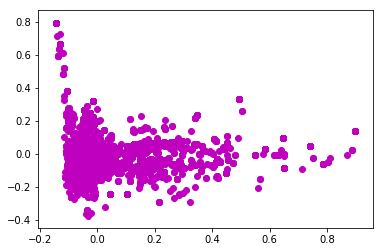

In [56]:
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

In [57]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [58]:
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 1, 10))

      features     score
0      queries  0.496445
1          oct  0.492582
2    statement  0.373664
3      showing  0.373636
4    processed  0.293376
5  outstanding  0.231687
6       advise  0.218244
7     attached  0.149488
8      payment  0.148160
9       fields  0.000000


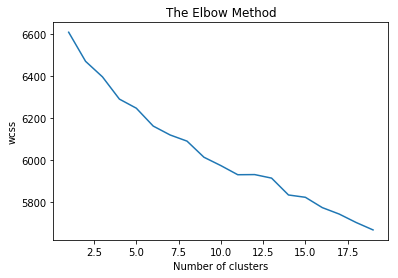

In [88]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [59]:
n_clusters = 6
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

In [60]:
labels

array([0, 5, 1, ..., 3, 1, 4])

In [61]:
labels.view

<function ndarray.view>

In [62]:
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = pca.transform(X_dense)

In [63]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

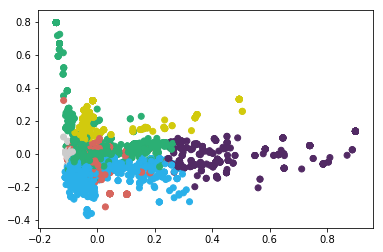

In [64]:
plt.scatter(coords[:, 0], coords[:, 1], c=colors)